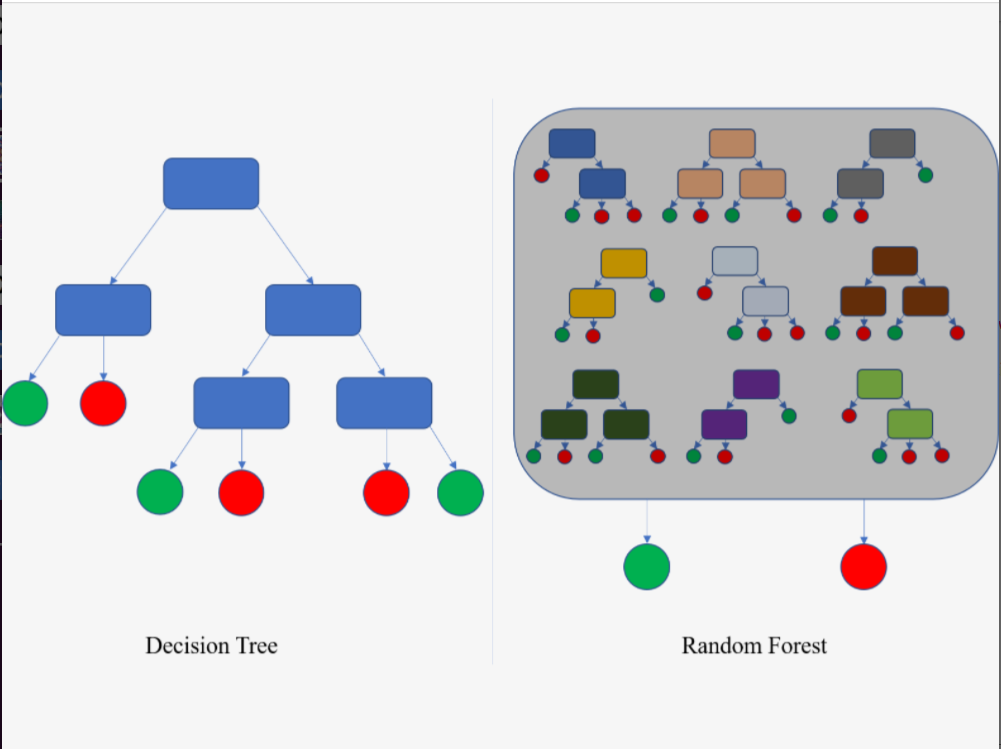

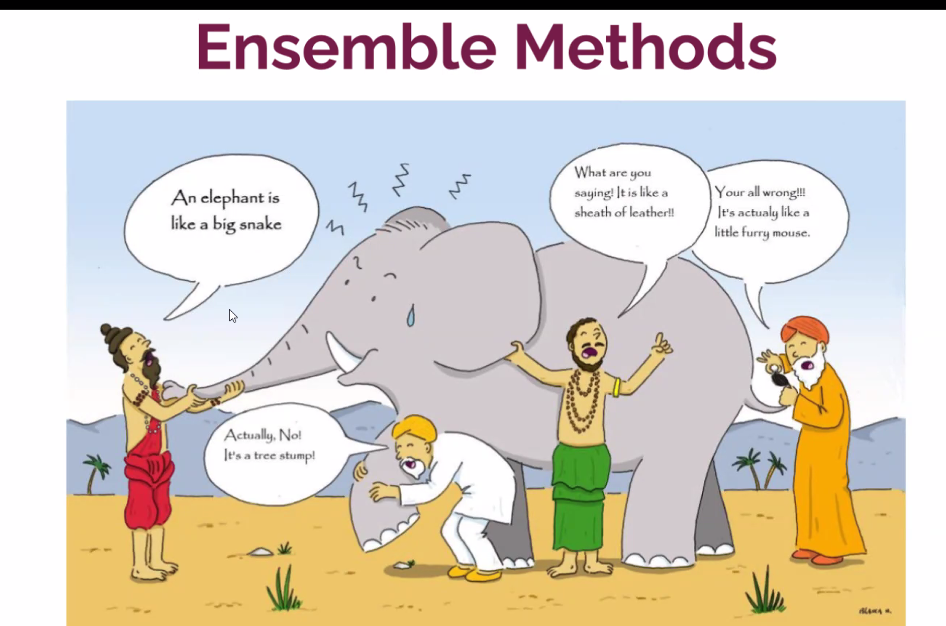

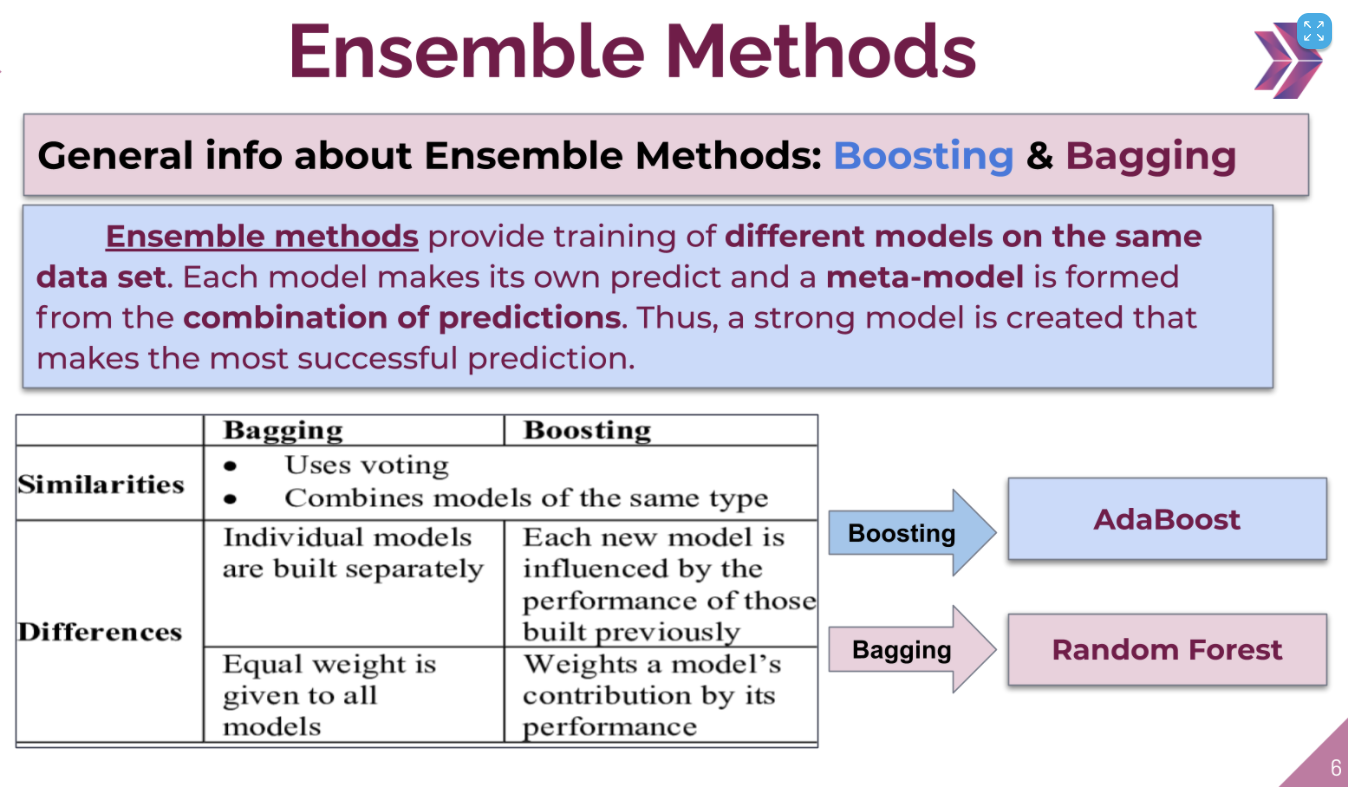

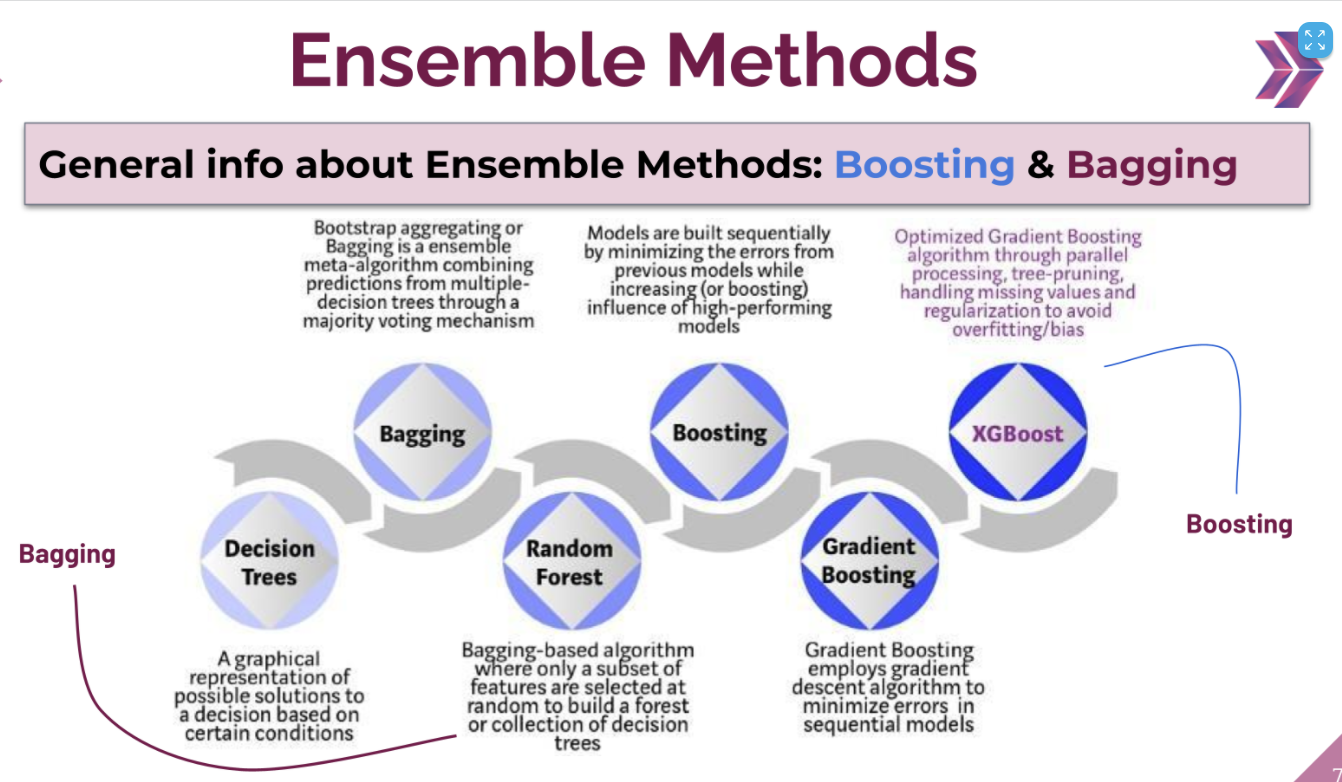

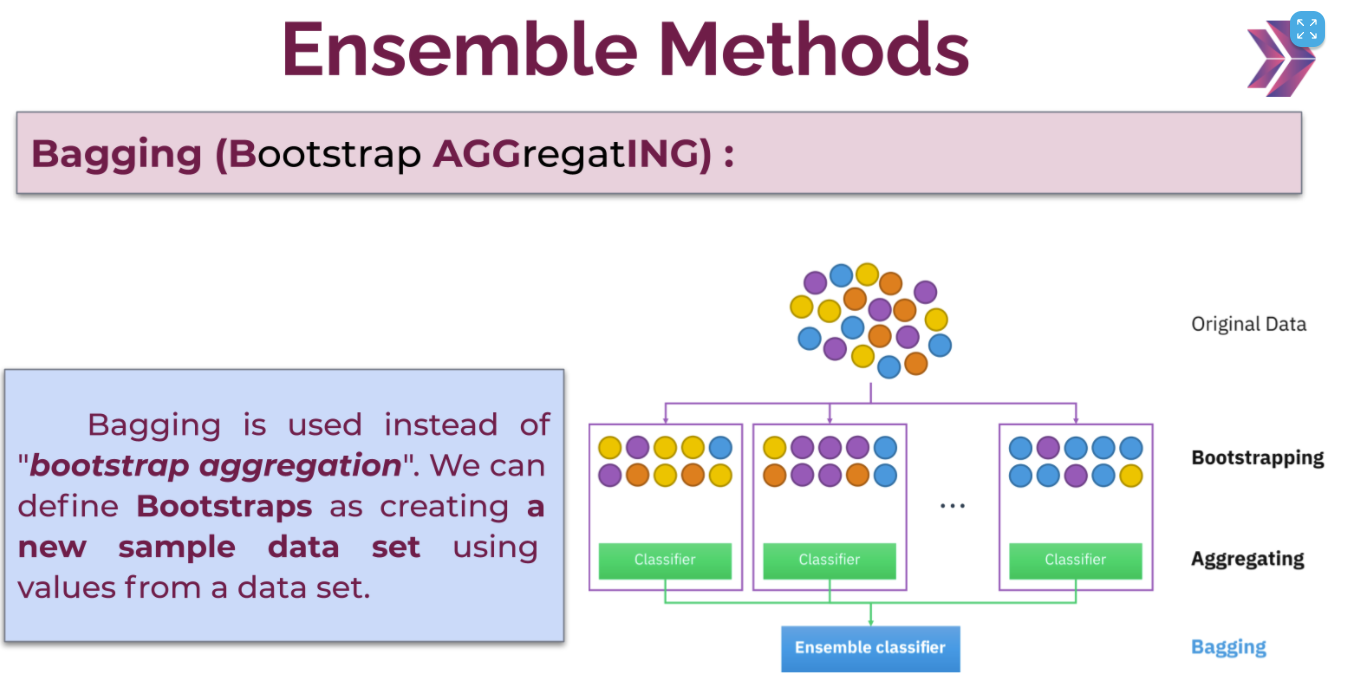

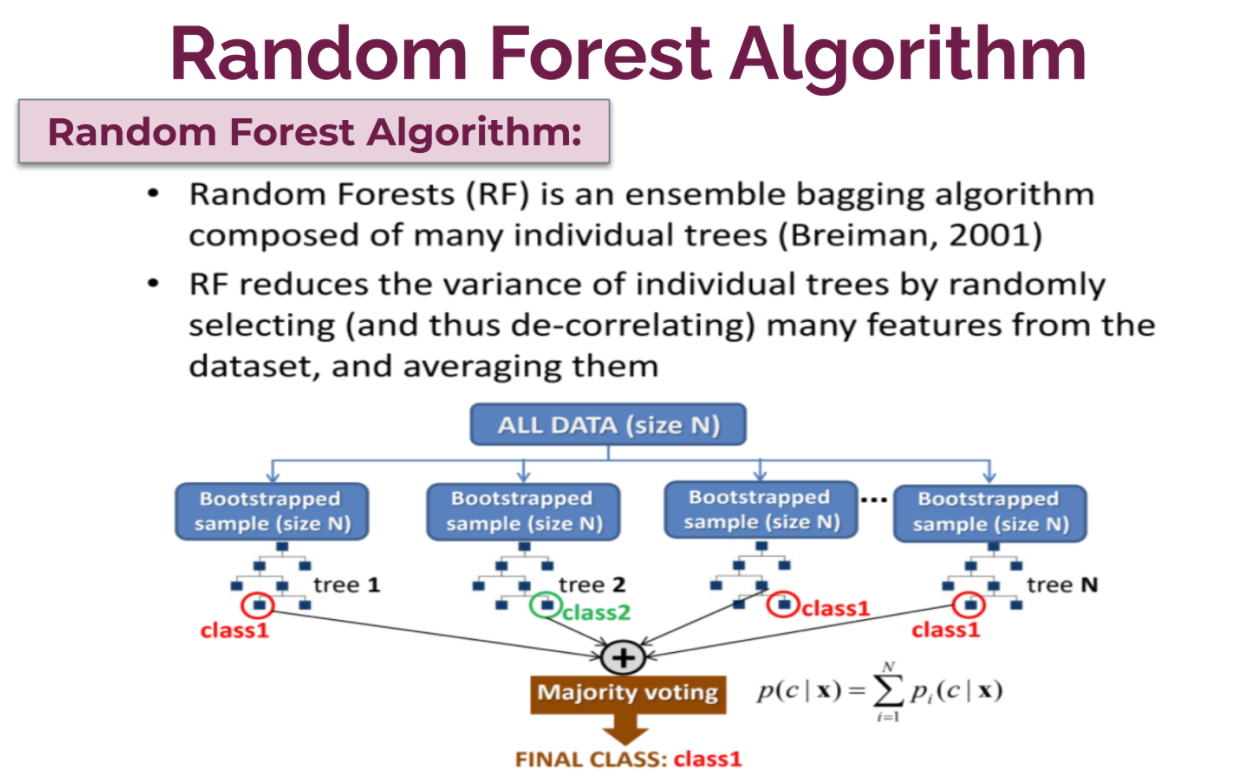

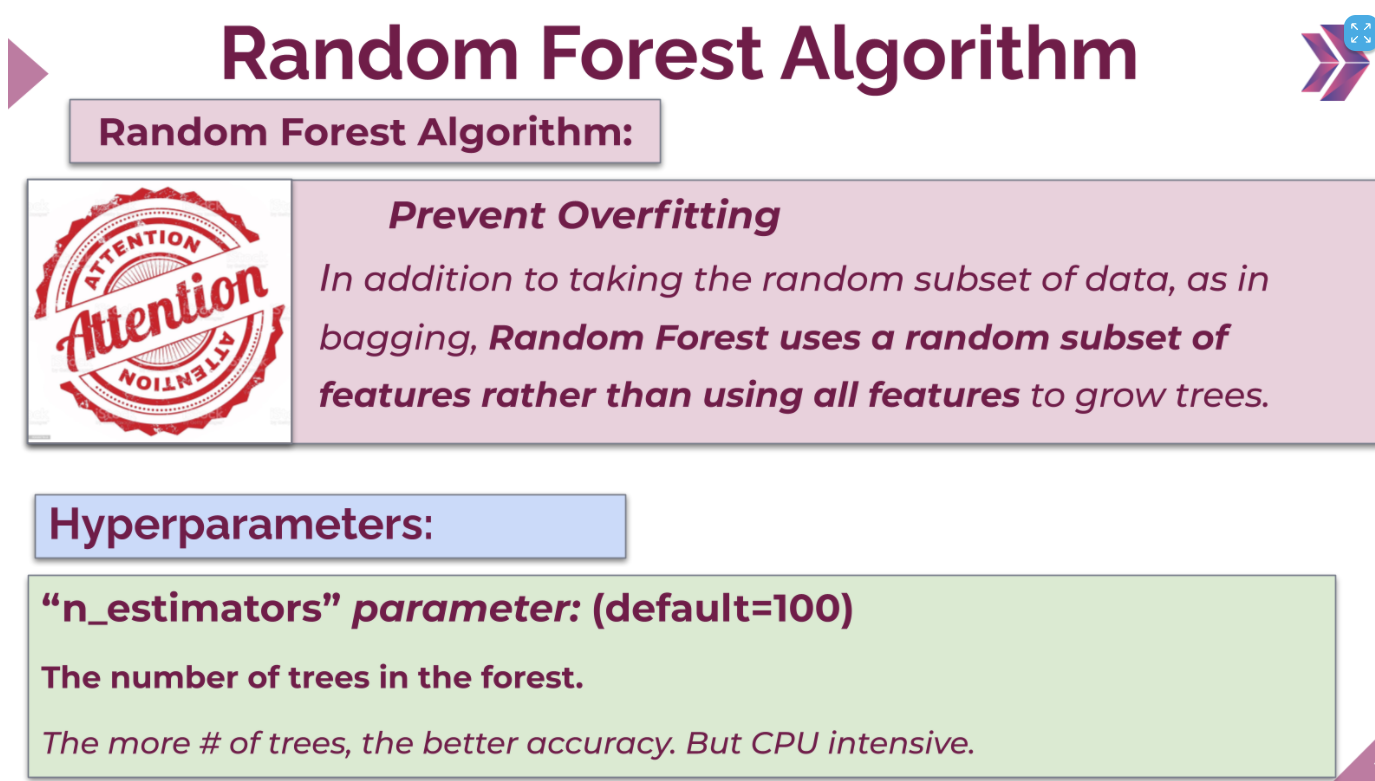

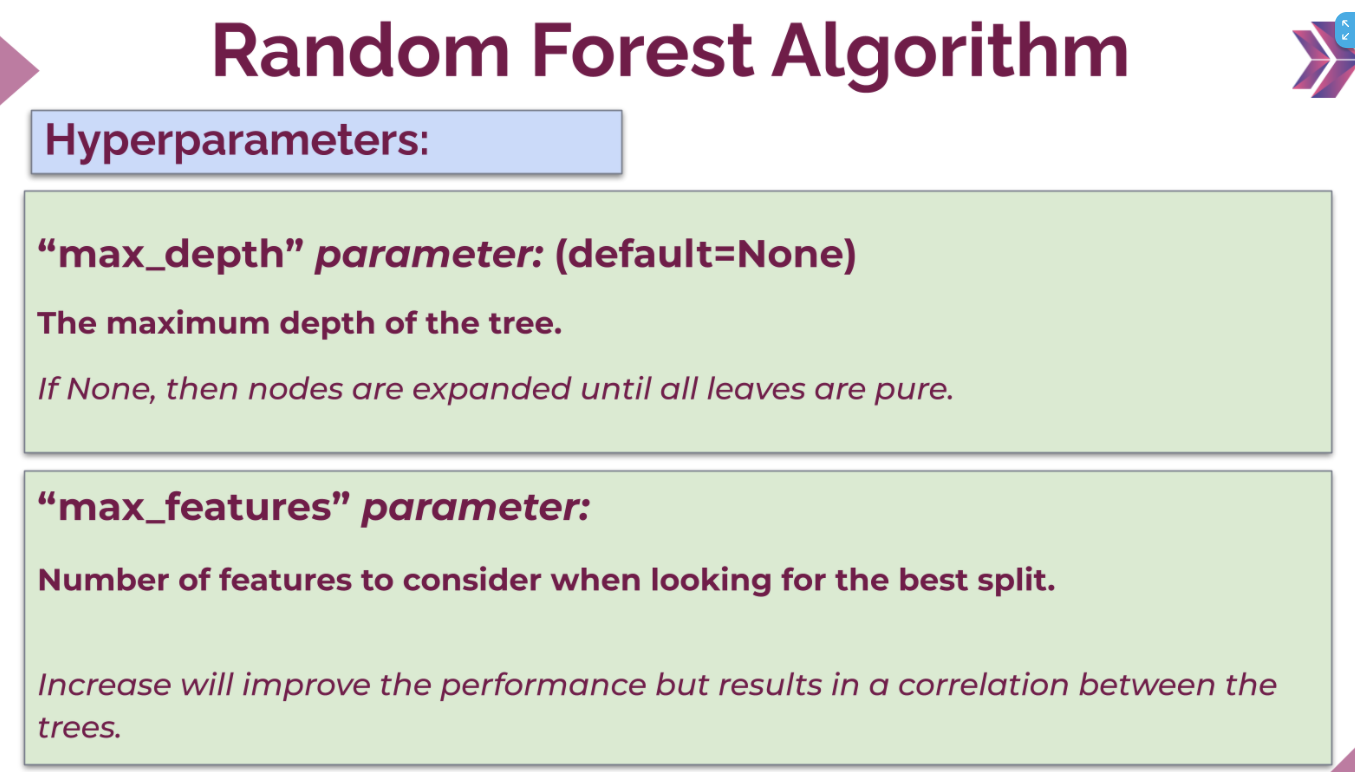

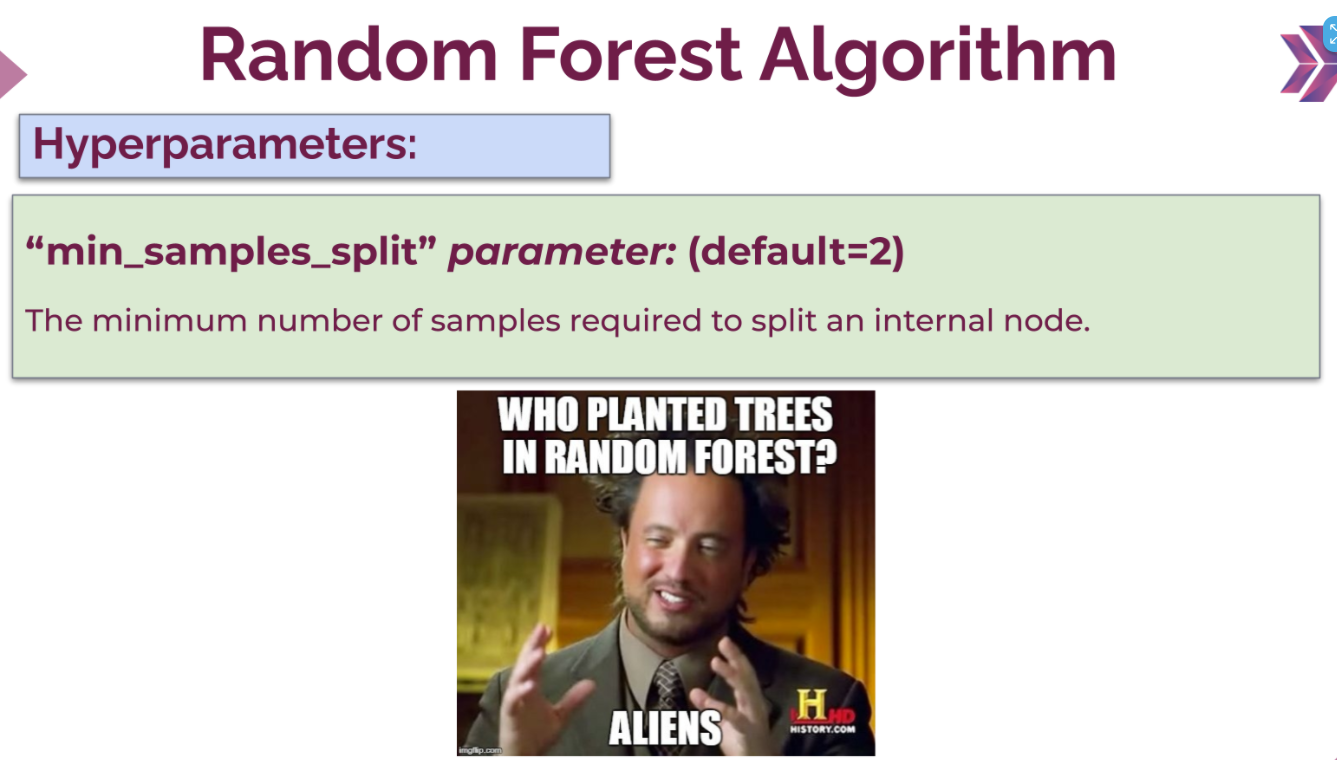

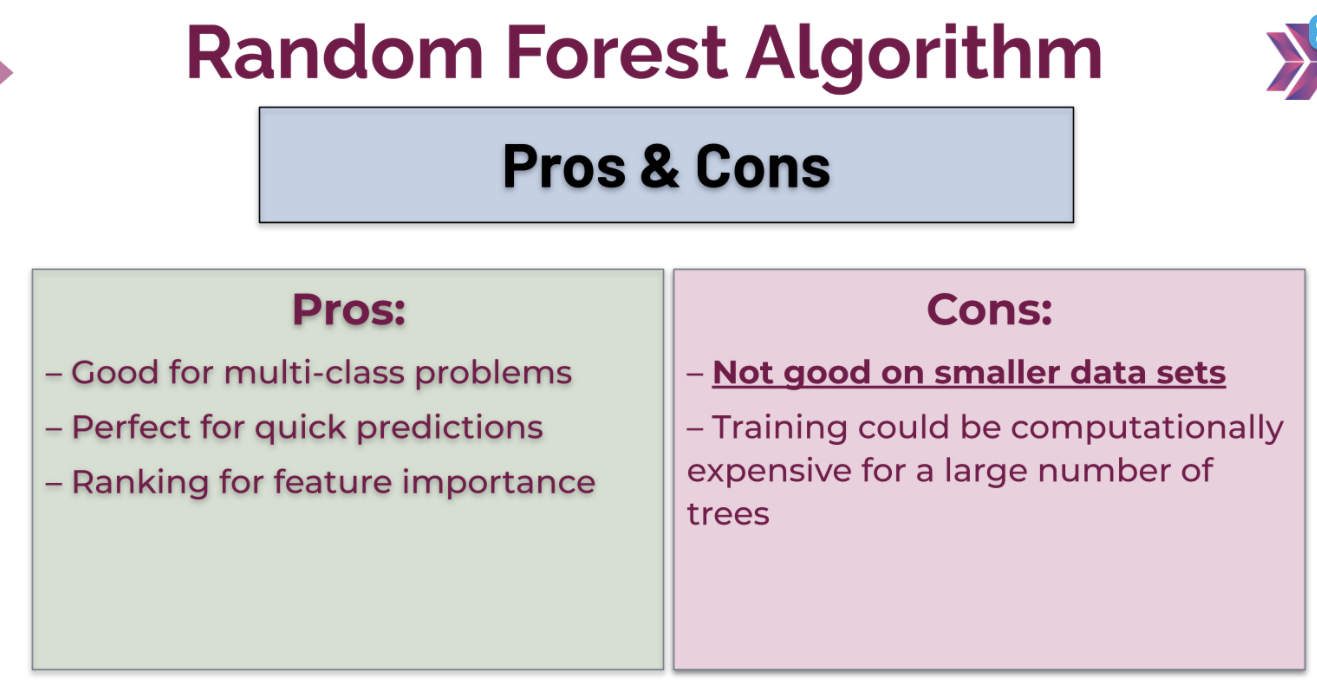

# Random Forest - Regression

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("USA_Housing.csv")
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.459                5.683                      7.009   
1         79248.642                6.003                      6.731   
2         61287.067                5.866                      8.513   
3         63345.240                7.188                      5.587   
4         59982.197                5.041                      7.839   

   Avg. Area Number of Bedrooms  Area Population       Price  \
0                         4.090        23086.801 1059033.558   
1                         3.090        40173.072 1505890.915   
2                         5.130        36882.159 1058987.988   
3                         3.260        34310.243 1260616.807   
4                         4.230        26354.109  630943.489   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.drop("Address", axis = 1, inplace = True)

In [5]:
df.describe().T

count        mean        std       min  \
Avg. Area Income             5000.000   68583.109  10657.991 17796.631   
Avg. Area House Age          5000.000       5.977      0.991     2.644   
Avg. Area Number of Rooms    5000.000       6.988      1.006     3.236   
Avg. Area Number of Bedrooms 5000.000       3.981      1.234     2.000   
Area Population              5000.000   36163.516   9925.650   172.611   
Price                        5000.000 1232072.654 353117.627 15938.658   

                                    25%         50%         75%         max  
Avg. Area Income              61480.562   68804.286   75783.339  107701.748  
Avg. Area House Age               5.322       5.970       6.651       9.519  
Avg. Area Number of Rooms         6.299       7.003       7.666      10.760  
Avg. Area Number of Bedrooms      3.140       4.050       4.490       6.500  
Area Population               29403.929   36199.407   42861.291   69621.713  
Price                        997577.135 1232669.378 1471210.204 2469065.594

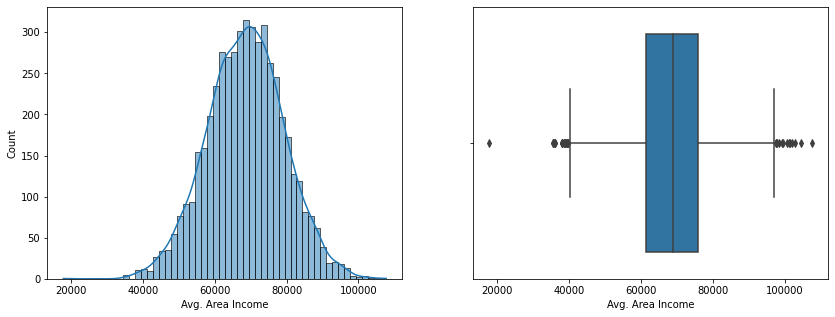

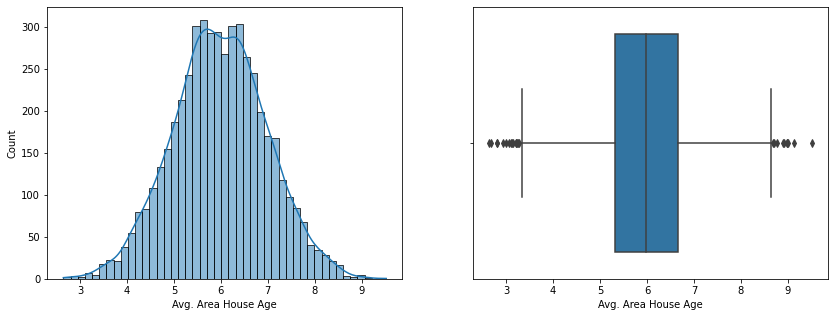

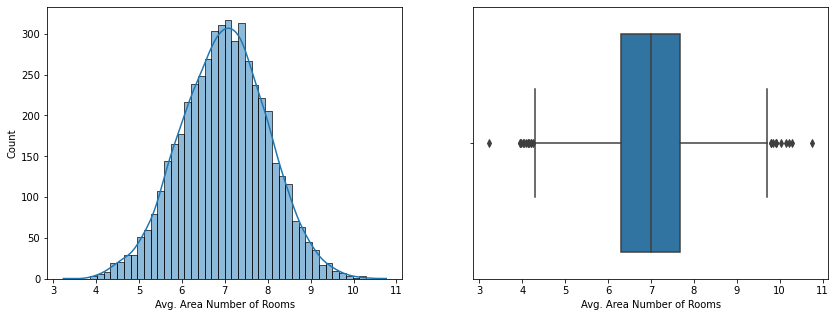

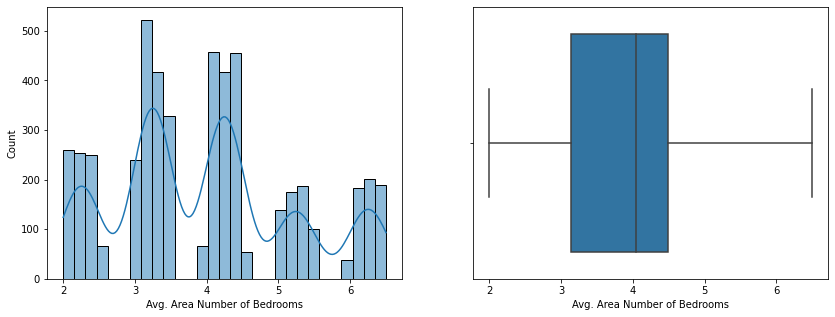

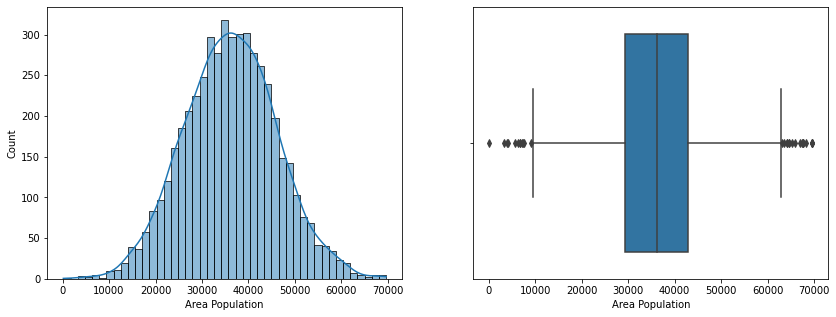

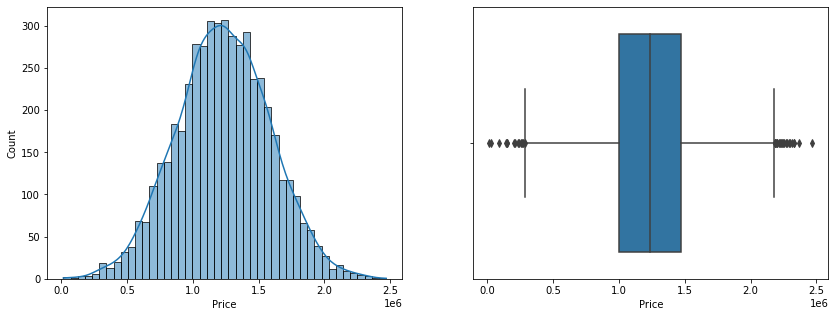

In [6]:
for col in df.columns:
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(x=df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.show()

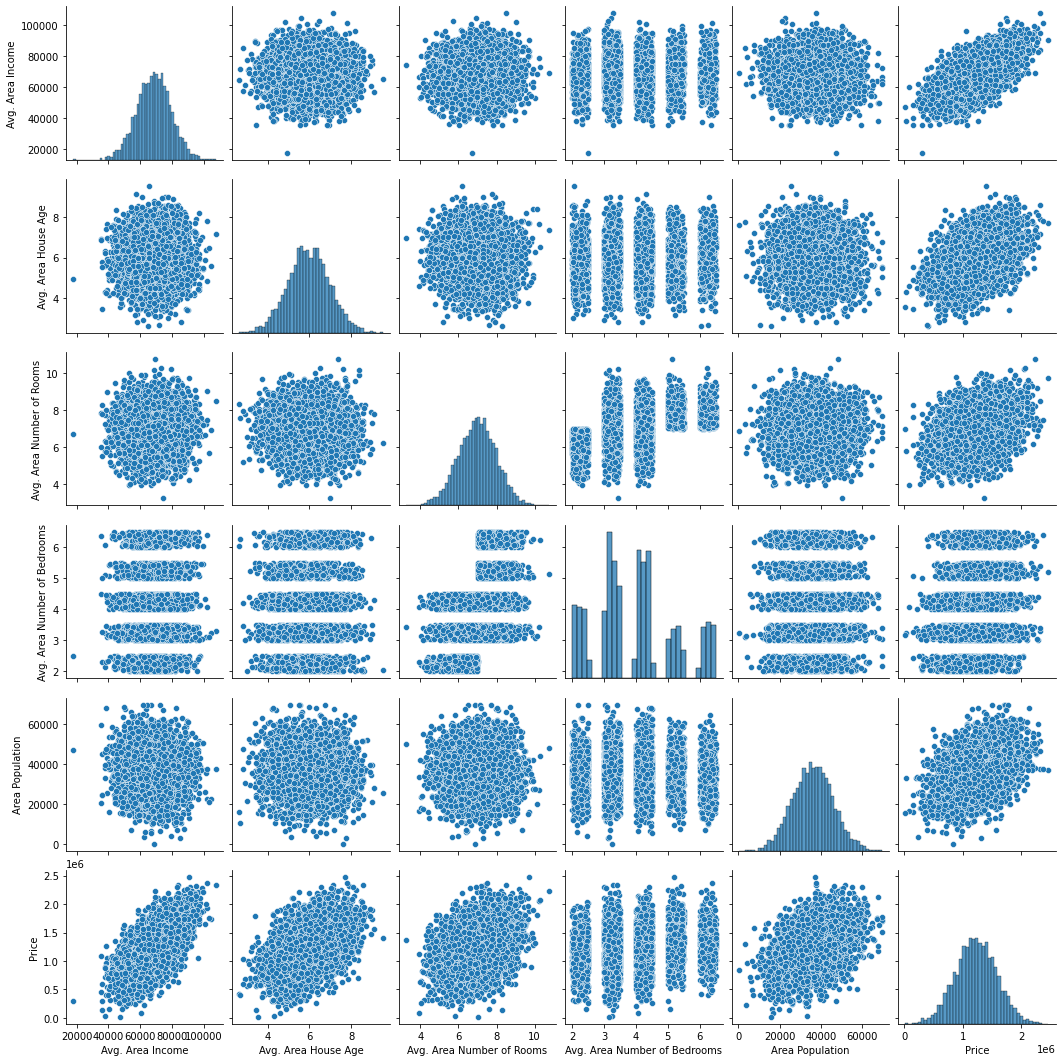

In [8]:
sns.pairplot(df);

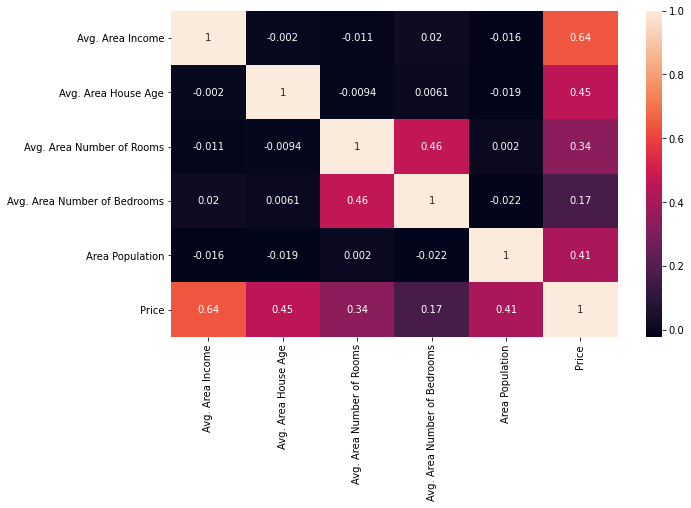

In [9]:
sns.heatmap(df.corr(), annot=True);

In [7]:
corr_by_price = df.corr()["Price"].sort_values()[:-1]
corr_by_price

Avg. Area Number of Bedrooms   0.171
Avg. Area Number of Rooms      0.336
Area Population                0.409
Avg. Area House Age            0.453
Avg. Area Income               0.640
Name: Price, dtype: float64

## Train | Test Split and Scalling

In [13]:
X = df.drop('Price',axis=1)
y = df['Price']

In [14]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [17]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [18]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [20]:
dt_model = DecisionTreeRegressor(random_state=101)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)
dt_r2 = r2_score(y_test, y_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

train_set        test_set
R2        1.000           0.748
mae       0.000      141441.075
mse       0.000 32271680110.656
rmse      0.000      179643.202

In [21]:
model = DecisionTreeRegressor(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error',
                                                          'neg_root_mean_squared_error'], cv =5)
df_scores = pd.DataFrame(scores)
print(df_scores.mean()[2:])
print("----------------------------------------------------------------")
df_scores

test_r2                                       0.751
test_neg_mean_absolute_error            -139527.777
test_neg_mean_squared_error        -30779436430.894
test_neg_root_mean_squared_error        -175403.998
dtype: float64
----------------------------------------------------------------


fit_time  score_time  test_r2  test_neg_mean_absolute_error  \
0     0.017       0.004    0.734                   -140239.359   
1     0.016       0.002    0.775                   -136667.800   
2     0.015       0.003    0.747                   -140250.847   
3     0.014       0.002    0.745                   -142881.293   
4     0.015       0.002    0.752                   -137599.584   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
0             -31405658221.175                       -177216.416  
1             -29394875137.733                       -171449.337  
2             -30960079255.758                       -175954.765  
3             -32718831270.214                       -180883.474  
4             -29417738269.591                       -171516.000

In [22]:
param_grid = {"splitter":["best", "random"],
              "max_features":[3, 5],
              "max_depth": [6,8,10],
              "min_samples_leaf": [3,5,7],
              "min_samples_split": [30]}

In [23]:
model = DecisionTreeRegressor(random_state=101)
dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='neg_root_mean_squared_error',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [24]:
dt_grid_model.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 30,
 'splitter': 'best'}

In [25]:
y_pred = dt_grid_model.predict(X_test)
y_train_pred = dt_grid_model.predict(X_train)
dt_tuned_r2 = r2_score(y_test, y_pred)
dt_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

train_set        test_set
R2             0.889           0.788
mae        92468.705      130495.406
mse  13793062721.098 27179420550.326
rmse      117443.871      164861.823

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

train_set        test_set
R2            0.984           0.885
mae       35376.025       96005.684
mse  2016198715.841 14777949461.723
rmse      44902.101      121564.590

In [28]:
model = RandomForestRegressor(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error',
                                                          'neg_root_mean_squared_error'], cv =5)
df_scores = pd.DataFrame(scores)
print(df_scores.mean()[2:])
print("----------------------------------------------------------------")
df_scores

test_r2                                       0.882
test_neg_mean_absolute_error             -95805.617
test_neg_mean_squared_error        -14523745497.691
test_neg_root_mean_squared_error        -120497.598
dtype: float64
----------------------------------------------------------------


fit_time  score_time  test_r2  test_neg_mean_absolute_error  \
0     0.899       0.027    0.872                    -97407.167   
1     0.907       0.025    0.888                    -96572.424   
2     0.878       0.025    0.882                    -96785.753   
3     0.905       0.031    0.885                    -95634.249   
4     0.924       0.025    0.885                    -92628.493   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
0             -15087575835.228                       -122831.494  
1             -14629448251.758                       -120952.256  
2             -14482445654.768                       -120343.033  
3             -14774315728.596                       -121549.643  
4             -13644942018.106                       -116811.566

In [30]:
param_grid = {"n_estimators":[100,300,500],
             "max_depth":[3,5,7],
             "max_features":[3,5],
             "min_samples_split":[2,4,6]}

In [31]:
model = RandomForestRegressor(random_state=101)
rf_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='neg_root_mean_squared_error',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [32]:
rf_grid_model.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 500}

In [32]:
y_pred = rf_grid_model.predict(X_test)
y_train_pred = rf_grid_model.predict(X_train)
rf_tuned_r2 = r2_score(y_test, y_pred)
rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

train_set        test_set
R2             0.907           0.849
mae        85925.425      108770.727
mse  11568017990.703 19389961945.087
rmse      107554.721      139247.844

### Comparing Feature Importance Between DT and RF

In [34]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

Feature Importance
Avg. Area Income                           0.431
Avg. Area House Age                        0.231
Area Population                            0.196
Avg. Area Number of Rooms                  0.126
Avg. Area Number of Bedrooms               0.017

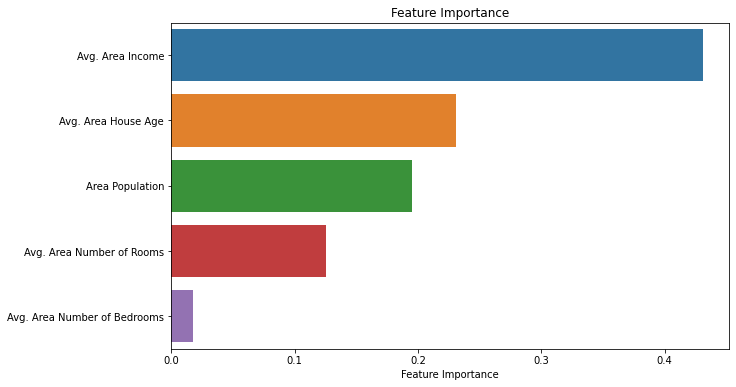

In [35]:
sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [36]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

Feature Importance
Avg. Area Income                           0.425
Avg. Area House Age                        0.231
Area Population                            0.195
Avg. Area Number of Rooms                  0.131
Avg. Area Number of Bedrooms               0.018

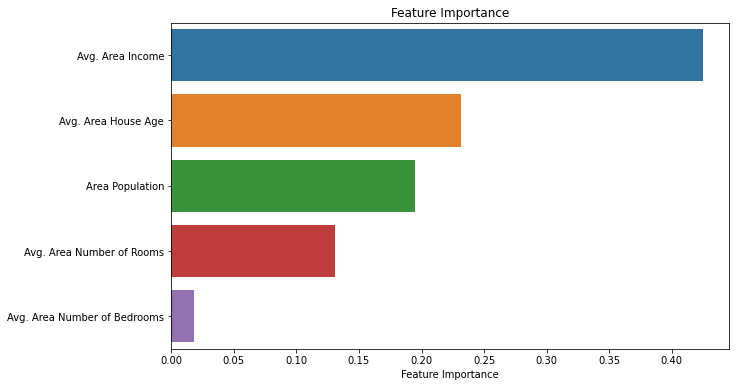

In [41]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

## Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [48]:
ln_model = LinearRegression()
ln_model.fit(X_train_scaled, y_train)
y_pred = ln_model.predict(X_test_scaled)
y_train_pred = ln_model.predict(X_train_scaled)
ln_r2 = r2_score(y_test, y_pred)
ln_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

train_set        test_set
R2             0.917           0.921
mae        81389.828       81305.233
mse  10252369473.406 10100187858.868
rmse      101253.985      100499.691

In [49]:
model = LinearRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error',
                                                                 'neg_root_mean_squared_error'], cv =5)
df_scores = pd.DataFrame(scores)
print(df_scores.mean()[2:])
print("----------------------------------------------------------------")
df_scores

test_r2                                       0.917
test_neg_mean_absolute_error             -81564.234
test_neg_mean_squared_error        -10297932393.551
test_neg_root_mean_squared_error        -101434.782
dtype: float64
----------------------------------------------------------------


fit_time  score_time  test_r2  test_neg_mean_absolute_error  \
0     0.003       0.001    0.909                    -82499.971   
1     0.001       0.002    0.921                    -82656.137   
2     0.001       0.001    0.916                    -81868.085   
3     0.002       0.000    0.914                    -83862.162   
4     0.001       0.000    0.922                    -76934.817   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
0             -10695165748.508                       -103417.434  
1             -10289669625.552                       -101438.009  
2             -10288509450.198                       -101432.290  
3             -10991704921.230                       -104841.332  
4              -9224612222.269                        -96044.845

## SVM

In [50]:
from sklearn.svm import SVR, LinearSVR

In [51]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)
y_train_pred = svr_model.predict(X_train_scaled)
svr_r2 = r2_score(y_test, y_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

train_set         test_set
R2              0.001           -0.001
mae        281117.882       286139.185
mse  123630254569.833 128210471354.512
rmse       351610.942       358064.898

In [53]:
model = SVR()

scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error',
                                                                 'neg_root_mean_squared_error'], cv =5)
df_scores = pd.DataFrame(scores)
print(df_scores.mean()[2:])
print("----------------------------------------------------------------")
df_scores,

# SVR() nin defaultu rbf olduğundan fakat datam lineer regresyona uygun olduğundan rbf li modelde skor 0 çıktı. 
# bu model datam için hiç uygun değil.

test_r2                                        0.000
test_neg_mean_absolute_error             -281229.474
test_neg_mean_squared_error        -123668729611.796
test_neg_root_mean_squared_error         -351591.704
dtype: float64
----------------------------------------------------------------


fit_time  score_time  test_r2  test_neg_mean_absolute_error  \
0     0.319       0.198    0.001                   -275414.416   
1     0.336       0.196   -0.001                   -289698.470   
2     0.321       0.205   -0.000                   -279360.091   
3     0.334       0.196    0.001                   -283483.914   
4     0.318       0.190    0.001                   -278190.478   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
0            -118029358433.284                       -343554.011  
1            -130886448720.645                       -361782.322  
2            -122555338527.068                       -350079.046  
3            -128124673170.776                       -357945.070  
4            -118747829207.206                       -344598.069

In [54]:
param_grid = {'C':[100,1000,10000],
             'kernel':['linear','poly'], # kernel ilkel yöntemde rbf idi. bu uygun olmadığı için linear ve poly olarak görmek istedik.  
              'gamma':['scale','auto'],  
              'degree':[2,3],  # poly kullandığımızda degree de kullanıyoruz (polynomial in derecesi olarak)
              'epsilon':[1,2,5,10]}

In [59]:
model = SVR()
svr_grid_model = GridSearchCV(estimator=model,
                              param_grid=param_grid,
                              scoring='neg_root_mean_squared_error',
                              n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [56]:
svr_grid_model.best_params_

{'C': 10000, 'degree': 2, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [60]:
y_pred = svr_grid_model.predict(X_test_scaled)
y_train_pred = svr_grid_model.predict(X_train_scaled)
svr_tuned_r2 = r2_score(y_test, y_pred)
svr_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

train_set        test_set
R2             0.917           0.921
mae        81360.620       81333.131
mse  10262430156.756 10084085416.826
rmse      101303.653      100419.547

## Model Comparing

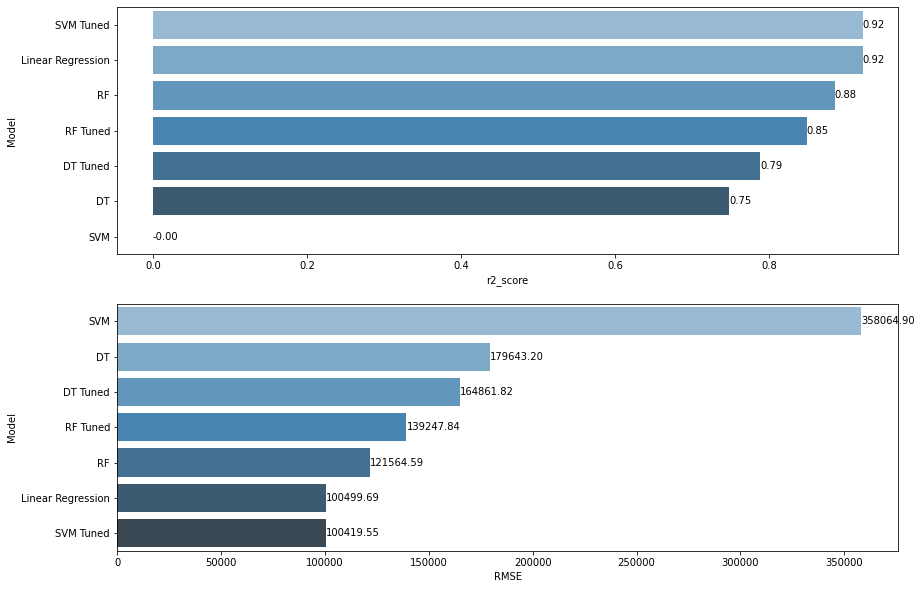

In [61]:
compare = pd.DataFrame({"Model": ["Linear Regression", "SVM", "SVM Tuned", "DT", "DT Tuned", "RF", "RF Tuned"],
                        "r2_score": [ln_r2, svr_r2, svr_tuned_r2, dt_r2, dt_tuned_r2, rf_r2, rf_tuned_r2],
                        "RMSE": [ln_rmse, svr_rmse, svr_tuned_rmse, dt_rmse, dt_tuned_rmse, rf_rmse, rf_tuned_rmse]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(211)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(212)
compare = compare.sort_values(by="RMSE", ascending=False)
ax=sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()